# Coarseness of Coarse Coding

This example illustrates the effect on learning of the size of the receptive fields in coarse coding.
- Linear function approximation based on coarse coding and (9.7) was used to learn a 1-dimensional square-wave function
 (shown at the top of Figure 9.8).
- The values of this function were used as the targets, $U_t$.
- With just 1 dimension, the receptive fields were intervals rather than circles.
- Learning was repeated with 3 different sizes of the intervals: narrow, medium, and broad, as shown at the bottom of the figure.
- All 3 cases had the same density of features, about 50 over the extent of the function being learned.
- Training examples were generated uniformly at random over this extent.
- The step-size parameter was $\alpha=\frac{0.2}{n}$, where $n$ is the number of features that were present at one time.

- Figure 9.8 shows the functions learned in all 3 cases over the course of learning.
- Note that the width of the features had a strong effect early in learning.
  - With broad features, the generalization tended to be broad.
  - With narrow features, only the close neighbors of each trained point were changed, causing the function learned to be more bumpy.
  - However, the final function learned was affected only slightly by the width of the features.
- Receptive field shape tends to have a strong effect on generalization but little effect on asymptotic solution quality.

In [1]:
from IPython.display import Image

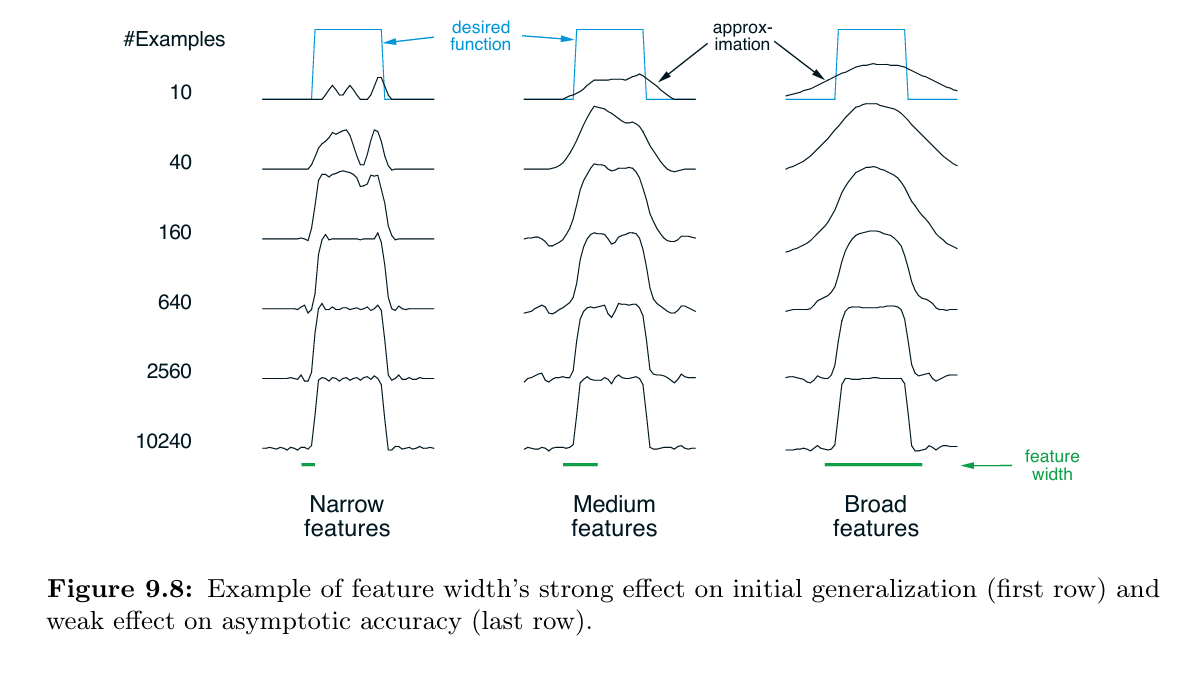

In [2]:
Image(filename="../book_images/Figure_9_8.PNG")

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.use('Agg')

In [4]:
from src.classes import DOMAIN, ValueFunction
from src.square_wave import sample, approximate

In [5]:
# Number of samples
num_of_samples = [10, 40, 160, 640, 2560, 10240]

# Feature widths
feature_width = [0.2, 0.4, 1.0]

In [6]:
plt.figure(figsize=(30, 20))

# Create OX axis
axis_x = np.arange(DOMAIN.left, DOMAIN.right, 0.02)

In [7]:
# For every number of sample
for index, num_of_sample in enumerate(num_of_samples):
    print(num_of_sample, "samples")

    # get samples
    samples = sample(num_of_sample)

    # initialize VFs
    value_function = [ValueFunction(feature_width) for feature_width in feature_width]

    plt.subplot(2, 3, index + 1)

    plt.title(f'{num_of_sample} samples')

    # for every VF
    for value_function in value_function:

        # train VF with a set of samples
        approximate(samples, value_function)

        # estimate point's value
        value_estimates = [value_function.value(x) for x in axis_x]

        plt.plot(axis_x, value_estimates, label = f'feature width {value_function.feature_width: .1f}')

plt.legend()

10 samples
40 samples
160 samples
640 samples
2560 samples
10240 samples


In [8]:
plt.savefig("../generated_images/figure_9_8.png")
plt.close()